In [2]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import cross_val_score  
import sklearn.preprocessing as Pre
%matplotlib inline              

In [3]:
import numpy as np    # Numeric and matrix computation
import pandas as pd   # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented

# Loading the dataset.
df = pd.read_csv('train.csv', sep=',', na_values="NA")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,Fence,MiscVal,SaleType,SaleCondition,SalePrice,MasVnr,SecondFloor,Baths,Porch,Pool
0,0.000000,F,RL,0.249485,1.0,Lvl,Inside,CollgCr,Norm,1Fam,...,0.0,0.0,WD,Normal,Level3,1.0,1.0,0.6,True,0.0
1,0.000685,A,RL,0.289612,1.0,Lvl,FR,Veenker,Feedr,1Fam,...,0.0,0.0,WD,Normal,Level2,0.0,0.0,0.4,True,0.0
2,0.001371,F,RL,0.347186,0.0,Lvl,Inside,CollgCr,Norm,1Fam,...,0.0,0.0,WD,Normal,Level3,1.0,1.0,0.6,True,0.0
3,0.002056,G,RL,0.287868,0.0,Lvl,Corner,Crawfor,Norm,1Fam,...,0.0,0.0,WD,Abnorml,Level2,0.0,1.0,0.2,True,0.0
4,0.002742,F,RL,0.452214,0.0,Lvl,FR,NoRidge,Norm,1Fam,...,0.0,0.0,WD,Normal,Level3,1.0,1.0,0.6,True,0.0


In [5]:
X = df.drop(columns='SalePrice')
Y = df.loc[:,'SalePrice']

le = Pre.LabelEncoder()
le.fit(Y)
Y = le.fit_transform(Y)
i = 0
for t in X.dtypes:
    if t == object or t == bool:
        le.fit(X.iloc[:,i])
        X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
    i += 1

X_train, X_test, y_train, y_test = cv.train_test_split(X, Y, test_size=.3, random_state=1)

In [6]:
df.describe()

,Id,LotArea,LotShape,OverallQual,YearBuilt,ExterQual,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,Fence,MiscVal,MasVnr,SecondFloor,Baths,Pool
count,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,...,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000
mean,0.500664,0.291637,0.641168,0.565678,0.719483,0.464534,0.326382,0.787031,0.934631,0.282466,...,0.503245,0.375116,0.199583,0.337961,0.195410,0.002795,0.406120,0.432545,0.283449,0.004172
std,0.289087,0.135757,0.479825,0.152616,0.219578,0.190476,0.128652,0.239375,0.247261,0.121520,...,0.220948,0.134034,0.210943,0.151760,0.396654,0.032222,0.491278,0.495601,0.182738,0.064482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250343,0.216337,0.000000,0.444444,0.594203,0.333333,0.247427,0.500000,1.000000,0.191212,...,0.333333,0.250000,0.000000,0.233993,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000
50%,0.502056,0.282634,1.000000,0.555556,0.731884,0.333333,0.307704,1.000000,1.000000,0.270884,...,0.333333,0.333333,0.333333,0.343885,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000
75%,0.749657,0.353379,1.000000,0.666667,0.934783,0.666667,0.398238,1.000000,1.000000,0.346210,...,0.666667,0.416667,0.333333,0.414388,0.000000,0.000000,1.000000,1.000000,0.400000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#knc = LinearSVC() 
knc = SVC(kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))

Confusion matrix on test set:
 [[ 19  18   0   0   0]
 [  5 250  22   0   1]
 [  0  17  60   6   1]
 [  0   0  10  17   2]
 [  0   0   0   3   1]]

Accuracy on test set:  0.8032407407407407


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


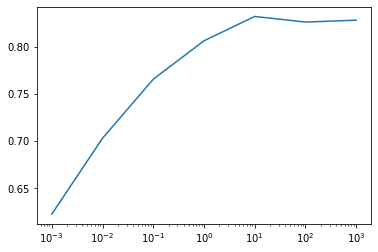

Acc. 10-fold cross on train data=  0.8320457534162372

Confusion matrix on test set:
 [[ 24  13   0   0   0]
 [  7 251  20   0   0]
 [  0  15  59   9   1]
 [  0   1  10  16   2]
 [  0   0   2   1   1]]

Accuracy on test set:  0.8125

Best value of parameter C found:  {'C': 10.0}

Number of supports:  388 ( 227 of them have slacks)
Prop. of supports:  0.3856858846918489


In [8]:
# List of C values to test. We usualy test diverse orders of magnitude
#Cs = np.logspace(-3, 11, num=15, base=10.0)
Cs = np.logspace(-3, 3, num=7, base=10.0)

param_grid = {'C': Cs}
#grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10)
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10)
grid_search.fit(X_train,y_train)

# Let's plot the 10-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())


# Let's apply the best C parameter found to the test set

#knc = LinearSVC(C=parval['C']) 
knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nBest value of parameter C found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

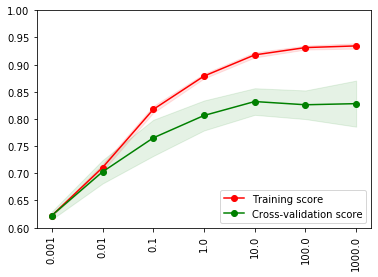

In [9]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc=4)


training_scores, test_scores = validation_curve(SVC(kernel='linear'), X_train, y_train, param_name="C", param_range=Cs,cv=10)
plot_validation_curve(range(len(Cs)), training_scores, test_scores)
plt.xticks(range(len(Cs)), Cs,rotation='vertical');
plt.ylim([0.6, 1])
plt.show()

In [8]:
knc = SVC(kernel='poly',degree =2) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))

Confusion matrix on test set:
 [[ 19  18   0   0   0]
 [  8 249  20   0   1]
 [  0  22  55   5   2]
 [  1   0  11  15   2]
 [  0   0   0   3   1]]

Accuracy on test set:  0.7847222222222222


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packa

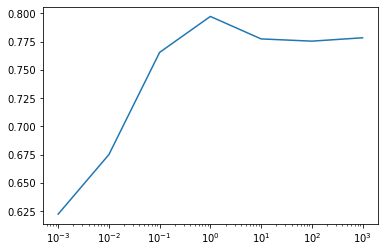

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packa

Acc. 10-fold cross on train data=  0.7970634572390909

Confusion matrix on test set:
 [[ 19  18   0   0   0]
 [  8 249  20   0   1]
 [  0  22  55   5   2]
 [  1   0  11  15   2]
 [  0   0   0   3   1]]

Accuracy on test set:  0.7847222222222222

Best combination of parameters found:  {'C': 1.0}

Number of supports:  542 ( 323 of them have slacks)
Prop. of supports:  0.5387673956262425


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [8]:
Cs = np.logspace(-3, 3, num=7, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =2) , param_grid, cv=10)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =2,C=parval['C']) , X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())


knc = SVC(kernel='poly',degree =2,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

In [9]:
knc = SVC(kernel='poly',degree =3) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))

Confusion matrix on test set:
 [[ 26  11   0   0   0]
 [ 29 228  21   0   0]
 [  2  22  52   8   0]
 [  1   1  14  12   1]
 [  0   0   0   3   1]]

Accuracy on test set:  0.7384259259259259


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packa

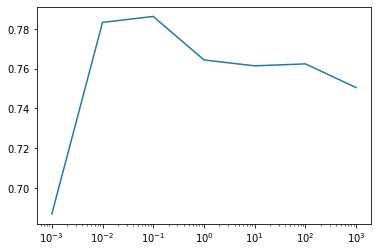

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packa

Acc. 10-fold cross on train data=  0.7861904398402636

Confusion matrix on test set:
 [[ 25  12   0   0   0]
 [ 10 244  23   1   0]
 [  1  25  49   8   1]
 [  1   1   9  17   1]
 [  0   0   0   4   0]]

Best combination of parameters found:  {'C': 0.1}

Accuracy on test set:  0.7754629629629629

Number of supports:  540 ( 198 of them have slacks)
Prop. of supports:  0.536779324055666


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [10]:
Cs = np.logspace(-3, 3, num=7, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =3) , param_grid, cv=10)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =3,C=parval['C']) , X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())

knc = SVC(kernel='poly',degree =3,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("\nConfusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

In [9]:
knc = SVC() 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))

Confusion matrix on test set:
 [[  6  31   0   0   0]
 [  2 253  23   0   0]
 [  0  38  44   2   0]
 [  0   7  14   8   0]
 [  0   0   0   4   0]]

Accuracy on test set:  0.7199074074074074


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


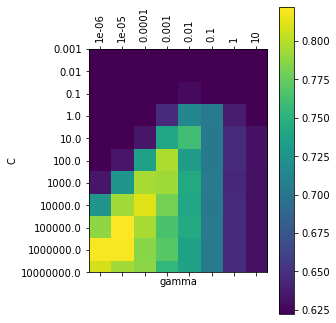


Best combination of parameters found:  {'C': 100000.0, 'gamma': 1e-05}

Acc. 10-fold cross on train data=  0.8222511730444364


In [10]:
# Values we will test for each parameter. When observin results, consider the limits of the 
# values tested and increase them if necessary 
gammas = [0.000001,0.00001, 0.0001,0.001,0.01,0.1,1,10]
Cs = np.logspace(-3, 7, num=11, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=10)
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
parval=grid_search.best_params_
print("\nBest combination of parameters found: ",parval)


cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('\nAcc. 10-fold cross on train data= ', cvacc.mean())